In [1]:
import tensorflow as tf
tf.random.set_seed(42)

## Load data

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()

## Explore data

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
len(train_labels), len(test_labels)

(60000, 10000)

In [5]:
train_labels, test_labels

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

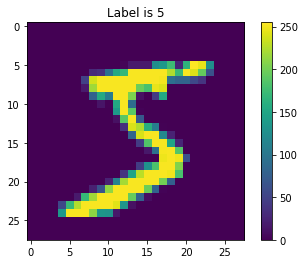

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0]) # , cmap='gray'
plt.colorbar()
plt.title('Label is {label}'.format(label=train_labels[0]))
plt.show()

## Data Preparation: scaling

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

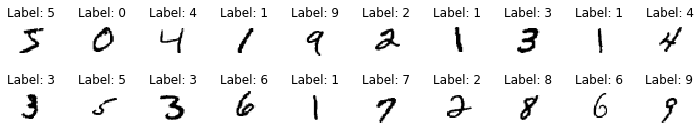

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# plot first 20 images
n = 20
_, axes = plt.subplots(2, 10, figsize=(10, 2))
plt.tight_layout()
for i in range(n):
    row, col = i // 10, i % 10
    axes[row, col].set_axis_off()
    axes[row, col].imshow(train_images[i,], cmap=plt.cm.binary, interpolation='nearest') # plt.cm.gray_r
    axes[row, col].set_title('Label: %i' % train_labels[i])

## Build MLP

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=train_images.shape[1:]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
mlp_model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=['accuracy'])

In [10]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
mlp_model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1373 - accuracy: 0.9602
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0936 - accuracy: 0.9730
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0699 - accuracy: 0.9793
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0549 - accuracy: 0.9839


In [12]:
test_loss, test_acc = mlp_model.evaluate(test_images,  test_labels, verbose=0)
test_acc

0.9747999906539917

## Build CNN

In [13]:
def build_cnn():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape= train_images.shape[1:] + (1, )),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),       
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    return model

In [14]:
cnn_model = build_cnn()

In [15]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [16]:
train_images_4d = train_images[..., tf.newaxis]
test_images_4d = test_images[..., tf.newaxis]
train_images_4d.shape, test_images_4d.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
cnn_model.fit(train_images_4d, train_labels, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 52s 55ms/step - loss: 0.1883 - accuracy: 0.9427
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0526 - accuracy: 0.9837
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0376 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0233 - accuracy: 0.9924


In [18]:
test_loss, test_acc = cnn_model.evaluate(test_images_4d,  test_labels, verbose=0)
test_acc

0.9890000224113464

## Make predictions

In [19]:
test_predictions = cnn_model.predict(test_images_4d)
test_predictions[:5]

array([[3.84047549e-09, 6.78562699e-08, 2.99618137e-07, 9.71605573e-07,
        8.41359480e-08, 7.15603710e-09, 3.66719865e-14, 9.99996781e-01,
        1.74116082e-07, 1.62966774e-06],
       [1.39899887e-08, 6.44863485e-06, 9.99993205e-01, 4.27024069e-08,
        1.19003388e-07, 8.33544844e-10, 1.25475790e-08, 1.52682034e-09,
        2.06294288e-07, 2.91852786e-09],
       [1.23445332e-07, 9.99979377e-01, 2.54028549e-07, 3.70118292e-09,
        7.86788405e-06, 3.11259055e-06, 1.20823316e-07, 8.33987451e-06,
        6.37926462e-07, 1.79338898e-07],
       [9.99870181e-01, 3.40352169e-09, 6.01858062e-07, 3.36806835e-07,
        1.91185180e-07, 4.16704324e-06, 1.90607007e-05, 9.20366074e-06,
        4.15522294e-07, 9.57312805e-05],
       [1.07382645e-08, 3.52653160e-07, 3.03753040e-07, 1.63677242e-07,
        9.99951005e-01, 7.82374343e-07, 4.19300932e-08, 8.36001846e-07,
        7.20754212e-09, 4.64620061e-05]], dtype=float32)

In [20]:
import numpy as np
np.argmax(test_predictions[0])

7

In [21]:
test_labels[0]

7